In [1]:
def q1(datazip):
    import numpy as np
    import pandas as pd
    import tensorflow as tf
    import matplotlib.pyplot as plt
    import seaborn as sns
    import warnings
    import math
    import random
    import zipfile
    import glob
    import os
    from keras.preprocessing.sequence import pad_sequences

    file_path=glob.glob(datazip)
    zf = zipfile.ZipFile(file_path[0])
    extension='csv'

    dfs= {os.path.basename(f)[:-4]:pd.read_csv(zf.open(f), header=None) for f in zf.namelist() if f.endswith(extension)}

    df_train=dfs['train']
    df_test=dfs['test']

    tk=tf.keras.preprocessing.text.Tokenizer(num_words=None, char_level=True, lower=True)
    tk.fit_on_texts(df_train[1])

    sequences=tk.texts_to_sequences(df_train[1])
    sequencestest=tk.texts_to_sequences(df_test[1])

    padded_sequences = pad_sequences(sequences, 5, padding='post')
    padded_sequences_test = pad_sequences(sequencestest, 5, padding='post')

    from keras.models import Sequential
    from keras.layers import Dense
    from keras.layers import Flatten
    from keras.layers.embeddings import Embedding

    model = Sequential()
    model.add(Embedding(input_dim=21, output_dim=5, input_length=5))
    model.add(Flatten())
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer='adam', loss='MeanAbsoluteError', metrics=['MAE'])

    print(model.summary())
    model.fit(padded_sequences, df_train[0], epochs=10, verbose=1)
    print("\nEVALUATION:\n ")
    model.evaluate(padded_sequences_test, df_test[0])
    
q1("data.zip")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 5, 5)              105       
_________________________________________________________________
flatten (Flatten)            (None, 25)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 26        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
3121/3121 [==============================] - 3s 636us/step - loss: 3.3281 - MAE: 3.3281
Epoch 2/10
3121/3121 [==============================] - 2s 614us/step - loss: 0.3632 - MAE: 0.3632
Epoch 3/10
3121/3121 [==============================] - 2s 588us/step - loss: 0.3564 - MAE: 0.3564
Epoch 4/10
3121/3121 [==============================] - 2s 623us/step - loss: 0.3553 -

Name: Peptide
Type: Graph 
Number of nodes: 4039
Number of edges: 88234

107
1684
1912
3437
0
2543
2347
1888
1800
1663


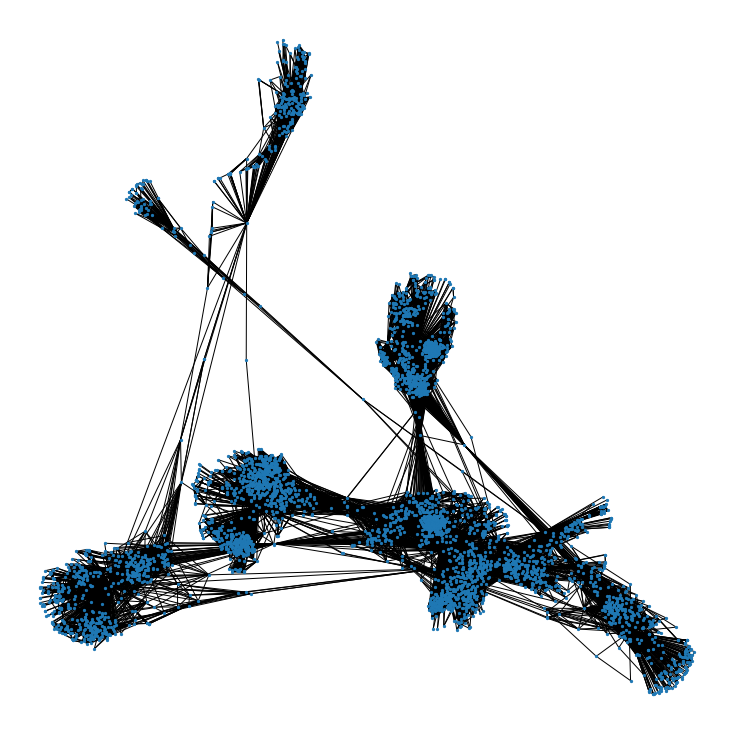

In [101]:
def q2(txt):
    import matplotlib.pyplot as plt
    import networkx as nx
    with open(txt, 'r') as v:
      lines = v.readlines()
    a=[]
    for line in lines:
      x=line.replace('\n', '')
      y=x.split(' ')
      a.append(y)

    G=nx.Graph()
    for x in range(len(a)):
      G.add_edge(int(a[x][0]),int(a[x][1]))

    degrees = G.degree()
    print("Name: Peptide\nType: Graph \nNumber of nodes: {}\nNumber of edges: {}\n" .format(G.number_of_nodes(),G.number_of_edges()))
    plt.figure(figsize=(10,10))
    nx.draw(G, node_size=5)

    cntr = nx.degree_centrality(G)

    for x in range(10):
      maximumkey = max(cntr, key=cntr.get)
      del cntr[maximumkey]
      print(maximumkey)
q2("data/facebook_combined.txt")

## Nodes with the high number of edges has more degree centrality. Since they connect  more nodes and remains in the center mostly.

In [112]:
def q3(outputfile):

    import networkx as nx
    import json
    import matplotlib.pyplot as plt
    from collections import Counter
    from operator import itemgetter
    import pandas as pd

    tweets=[]

    outputfile=open(outputfile,encoding='utf')

    for line in outputfile:
        tweets.append(json.loads(line))    
    i=0
    a=[]
    directedstr=[]
    directedlist=[]
    for tweet in tweets:
        if "retweeted_status" in tweet:
            #retweetleyen
            a.append(tweet.get("user", {}).get("screen_name"))
            #retweetlenen
            a.append(tweet.get("retweeted_status", {}).get("user").get("screen_name"))
            directedstr.append(str(a))
            directedlist.append(a)

            a=[] 

    for x in range(len(directedlist)):
        directedlist[x].append(directedstr.count(str(directedlist[x])))

    unique_data = [list(x) for x in set(tuple(x) for x in directedlist)]


    G = nx.DiGraph()
    for x in range(len(unique_data)):
      G.add_weighted_edges_from([(unique_data[x][0],unique_data[x][1],unique_data[x][2])])


    values=[]   
    counts=[]
    for x in range(len(unique_data)):
        values=[unique_data[x][1],G.in_degree(unique_data[x][1],weight="weight")]
        counts.append(values)
        values=[]   


    import pandas as pd
    df5=pd.DataFrame(counts,columns=['screen_names','in_degree_with_weight'])
    df5=df5.sort_values('in_degree_with_weight',ascending=False).drop_duplicates('screen_names',keep='last').head(10).reset_index().drop(['index'], axis=1)


    valueso=[]   
    countso=[]
    for x in range(len(unique_data)):
        valueso=[unique_data[x][0],G.out_degree(unique_data[x][0],weight="weight")]
        countso.append(valueso)
        valueso=[] 


    df6=pd.DataFrame(countso,columns=['screen_names','out_degree_with_weight'])
    df6=df6.sort_values('out_degree_with_weight',ascending=False).drop_duplicates('screen_names',keep='last').head(10).reset_index().drop(['index'], axis=1)

    return(df5,df6)

(id,od)=q3("random_100k_set1.jsonl")
id

,screen_names,in_degree_with_weight
0,ekrem_imamoglu,1913
1,kacsaatolduson,1100
2,themarginale,733
3,cbabdullahgul,733
4,enveryan,613
5,gazetesozcu,570
6,ucurbenipegasus,549
7,ismailsaymaz,494
8,fatihportakal,490
9,06melihgokcek,480


In [113]:
od

,screen_names,out_degree_with_weight
0,IslamGoksal,58
1,orhanpelin84,50
2,REIS7206,46
3,Hatice69180392,45
4,EytKul,39
5,VeliKay54738267,38
6,ecrinakpinar,37
7,MuratNR3,36
8,musaciftci22,36
9,maden_cigdem,36
